In [1]:
import os
from tempfile import tempdir
from time import time
from turtle import color
from unittest.mock import NonCallableMagicMock
import pandas as pd
import numpy as np
import warnings
import math
import re

import seaborn as sns
warnings.filterwarnings("ignore")

import sys
sys.path.append("./")

from pathlib import Path

import tqdm
import importlib

import matplotlib.pyplot as plt
# from PySide2.QtWidgets import QFileDialog, QApplication
# from PySide2.QtCore import Qt
from copy import copy 

from corems.mass_spectra.input import rawFileReader
from corems.molecular_id.factory.classification import HeteroatomsClassification, Labels
from corems.molecular_id.search.priorityAssignment import OxygenPriorityAssignment
from corems.molecular_id.search.molecularFormulaSearch import SearchMolecularFormulas
from corems.encapsulation.factory.parameters import MSParameters
from corems.encapsulation.constant import Atoms
from corems.mass_spectrum.calc.Calibration import MzDomainCalibration

import corems.lc_icpms_ftms.calc.lc_icrms_qc_assign as icrms
import corems.lc_icpms_ftms.calc.lc_icrms_helpers as lcmsfns

import importlib
importlib.reload(icrms)


rawfile='/Users/christiandewey/Library/CloudStorage/Box-Box/Boiteau Lab/Mass Spec Data/21T at NHMFL/2022-10 Nicole & Christian/Christian/backup/20221102_LBA_Boiteau_Zorbax3p5_slough_400_500_02.raw'



In [10]:
# reload modules 
importlib.reload(icrms)
importlib.reload(lcmsfns)

<module 'corems.lc_icpms_ftms.calc.lc_icrms_helpers' from '/Users/christiandewey/CoreMS/corems/lc_icpms_ftms/calc/lc_icrms_helpers.py'>

In [2]:
# set fname

fname = 'slough-CHON3Cu_22-12-20.csv'

In [3]:
# get parser

parser = rawFileReader.ImportMassSpectraThermoMSFileReader(rawfile) 


In [4]:
# set assignment parameters
MSParameters.mass_spectrum.threshold_method = 'signal_noise'
MSParameters.mass_spectrum.s2n_threshold = 2
MSParameters.ms_peak.peak_min_prominence_percent = 0.001

MSParameters.molecular_search.error_method = 'None'
MSParameters.molecular_search.min_ppm_error = -0.25
MSParameters.molecular_search.max_ppm_error = 0.25

MSParameters.molecular_search.isProtonated = True
MSParameters.molecular_search.isRadical = False
MSParameters.molecular_search.isAdduct = False

MSParameters.molecular_search.score_method = "prob_score"
MSParameters.molecular_search.output_score_method = "prob_score"

MSParameters.molecular_search.url_database = None
MSParameters.molecular_search.min_dbe = -1
MSParameters.molecular_search.max_dbe = 20

MSParameters.molecular_search.usedAtoms['C'] = (1,50)
MSParameters.molecular_search.usedAtoms['H'] = (4,100)
MSParameters.molecular_search.usedAtoms['O'] = (1,20)
MSParameters.molecular_search.usedAtoms['N'] = (0,3)
MSParameters.molecular_search.usedAtoms['Cu'] = (0,1)
MSParameters.molecular_search.usedAtoms['Fe'] = (0,1)
MSParameters.molecular_search.usedAtoms['S'] = (0,1)
MSParameters.molecular_search.usedAtoms['P'] = (0,1)




In [11]:
# run assignment algorithm
timerange = [4,22]  # start (min) to stop (min)
interval = 2  # min 
refmasslist = "/Users/christiandewey/CoreMS/tests/tests_data/ftms/nom_pos.ref"

data_df = lcmsfns.assign_formula(parser=parser, interval = interval, timerange = timerange, refmasslist = refmasslist, calorder =2)



timestart: 4
MS Obj loaded - 1844 peaks found.
MS Obj loaded - 1844 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
40 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.027 ppm
minimize function performed 335 fn evals and 4 iterations
'runworker'  4934.11 ms


Loading molecular formula database: 133878it [00:04, 32414.50it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 106.04it/s]


'run_molecular_formula'  10626.51 ms
734 assigned peaks and 1110 unassigned peaks, total  = 39.80 %, relative abundance = 35.71 %, RMS error (best candidate) (ppm) = 0.065
timestart: 6
MS Obj loaded - 1923 peaks found.
MS Obj loaded - 1923 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
63 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 254 fn evals and 3 iterations
'runworker'  4884.86 ms


Loading molecular formula database: 133878it [00:03, 33528.76it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 99.75it/s]


'run_molecular_formula'  10511.95 ms
1017 assigned peaks and 906 unassigned peaks, total  = 52.89 %, relative abundance = 46.30 %, RMS error (best candidate) (ppm) = 0.061
timestart: 8
MS Obj loaded - 2017 peaks found.
MS Obj loaded - 2017 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
83 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.030 ppm
minimize function performed 269 fn evals and 3 iterations
'runworker'  5067.48 ms


Loading molecular formula database: 133878it [00:03, 37027.90it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 96.82it/s] 


'run_molecular_formula'  10366.10 ms
1121 assigned peaks and 896 unassigned peaks, total  = 55.58 %, relative abundance = 54.28 %, RMS error (best candidate) (ppm) = 0.067
timestart: 10
MS Obj loaded - 1914 peaks found.
MS Obj loaded - 1914 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
98 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 272 fn evals and 3 iterations
'runworker'  5156.29 ms


Loading molecular formula database: 133878it [00:03, 37500.71it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 101.79it/s]


'run_molecular_formula'  10329.06 ms
1138 assigned peaks and 776 unassigned peaks, total  = 59.46 %, relative abundance = 60.55 %, RMS error (best candidate) (ppm) = 0.050
timestart: 12
MS Obj loaded - 2051 peaks found.
MS Obj loaded - 2051 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
110 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.066 ppm
minimize function performed 260 fn evals and 3 iterations
'runworker'  5139.43 ms


Loading molecular formula database: 133878it [00:03, 34057.09it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 95.46it/s] 


'run_molecular_formula'  10776.67 ms
1185 assigned peaks and 866 unassigned peaks, total  = 57.78 %, relative abundance = 64.25 %, RMS error (best candidate) (ppm) = 0.051
timestart: 14
MS Obj loaded - 1980 peaks found.
MS Obj loaded - 1980 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
116 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.023 ppm
minimize function performed 266 fn evals and 3 iterations
'runworker'  5079.71 ms


Loading molecular formula database: 133878it [00:03, 37854.15it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 98.22it/s] 


'run_molecular_formula'  10274.77 ms
1184 assigned peaks and 796 unassigned peaks, total  = 59.80 %, relative abundance = 67.85 %, RMS error (best candidate) (ppm) = 0.059
timestart: 16
MS Obj loaded - 1920 peaks found.
MS Obj loaded - 1920 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
122 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 265 fn evals and 3 iterations
'runworker'  5057.74 ms


Loading molecular formula database: 133878it [00:03, 39674.16it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 102.21it/s]


'run_molecular_formula'  10028.16 ms
1124 assigned peaks and 796 unassigned peaks, total  = 58.54 %, relative abundance = 70.38 %, RMS error (best candidate) (ppm) = 0.053
timestart: 18
MS Obj loaded - 1580 peaks found.
MS Obj loaded - 1580 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
118 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 179 fn evals and 2 iterations
'runworker'  5312.71 ms


Loading molecular formula database: 133878it [00:03, 39557.44it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 123.00it/s]


'run_molecular_formula'  10027.55 ms
917 assigned peaks and 663 unassigned peaks, total  = 58.04 %, relative abundance = 75.80 %, RMS error (best candidate) (ppm) = 0.050
timestart: 20
MS Obj loaded - 1251 peaks found.
MS Obj loaded - 1251 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
104 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.029 ppm
minimize function performed 178 fn evals and 2 iterations
'runworker'  5491.68 ms


Loading molecular formula database: 133878it [00:03, 41298.34it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 156.33it/s]


'run_molecular_formula'  9785.49 ms
730 assigned peaks and 521 unassigned peaks, total  = 58.35 %, relative abundance = 79.69 %, RMS error (best candidate) (ppm) = 0.061


In [25]:
# add 'm/z window' and 'rep' columns
data_df['file'] ='20221102_LBA_Boiteau_Zorbax3p5_slough_400_500_02.raw'
data_df = lcmsfns.add_mzwindow_col(data_df)


print(data_df['m/z window'].unique())
print(data_df['file'].unique())
print(data_df['m/z Window Size'].unique())


['400-500 m/z']
['20221102_LBA_Boiteau_Zorbax3p5_slough_400_500_02.raw']
['100 m/z']


In [26]:
# assign molecule classes 
# 

heter = ['N','Cu']

molclasses = lcmsfns.get_mol_classes(heter)

data_df = lcmsfns.assign_mol_class(data_df,molclasses)

print('Molecule classes: ', data_df['mol_class'].unique() )


Molecule classes:  ['CHON' 'CHO' 'Unassigned' 'CHOCu']


In [10]:
# save assignment results as pd dataframe and export as .csv 
data_df.to_csv("/Users/christiandewey/Library/CloudStorage/Box-Box/data/assignments/"+fname)


In [11]:
#-#-#-# read assignment results from .csv
data_df = pd.read_csv("/Users/christiandewey/Library/CloudStorage/Box-Box/data/assignments/"+fname)

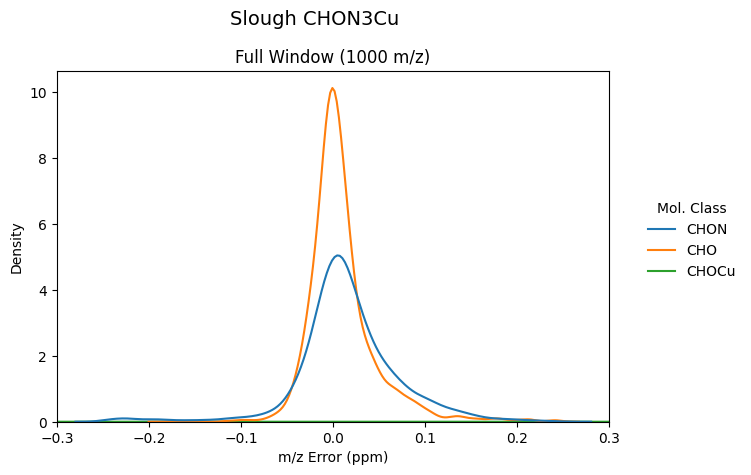

In [27]:
# plot assignment error kernel density

ttt = 'Slough CHON3Cu'  ## title for main plot

fig, ax1 = plt.subplots()
sns.kdeplot(data=data_df[data_df['mol_class']!='Unassigned'], x="m/z Error (ppm)", hue="mol_class", ax = ax1)
ax1.set_xlim(-0.3,0.3)
ax1.set_title( 'Full Window (1000 m/z)')
legend = ax1.get_legend()
handles = legend.legendHandles
labels = data_df[data_df['mol_class']!='Unassigned']['mol_class'].unique()
legend.remove()




fig.suptitle(ttt, fontsize=14)
fig.legend(handles, labels, title='Mol. Class', frameon = False, bbox_to_anchor=(1.0,0.5), loc = 'center left')

plt.tight_layout()

plt.show()


In [28]:
# create subsets of assigned features 
assigned = data_df[~data_df['Molecular Formula'].isnull()]


print('400-500 m/z, 100 m/z windowing: \n%s features total; %s assigned (%.1f%%)' %(np.shape(data_df)[0],  np.shape(assigned)[0], np.shape(assigned)[0] / np.shape(data_df)[0] * 100))


400-500 m/z, 100 m/z windowing: 
14405 features total; 8377 assigned (58.2%)


In [29]:
# create subsets of unique features 
print('400-500 m/z, 100 m/z windowing:')
unique = lcmsfns.getUniqueFeatures(assigned)



400-500 m/z, 100 m/z windowing:
total # results: 8377
# unique results: 8377


In [41]:
# 100 m/z window, error plots with blank substraction

cu_features = data_df[(data_df['Cu']>0)]

print(cu_features)

#410.151212

#data.master_data_holder['20221103_LBA_Boiteau_Zorbax3p5_spring_400_500_rep2.raw'] #[file]={'parser': parser}

EICdic = {}
for mz,mf in zip(cu_features['m/z'],cu_features['Molecular Formula']):
 
    EIC=parser.get_eics(target_mzs=[mz],tic_data={},peak_detection=False,smooth=False)
    EICdic[mf]=EIC[0][mz]

       Index         m/z  Calibrated m/z  Calculated m/z  Peak Height  \
2429    1130  452.142513      452.142595      452.142569   591.155025   
3923     271  414.048284      414.048375      414.048275   986.973090   
8753    1811  487.006986      487.007078      487.007139   974.815510   
10801   1743  487.001577      487.001683      487.001778   564.280810   
11821    161  410.151212      410.151314      410.151284  1295.122841   
13725    123  410.151210      410.151310      410.151284   850.442536   
15863   1066  485.100540      485.100649      485.100645   348.454069   

       Peak Area  Resolving Power        S/N  Ion Charge  m/z Error (ppm)  \
2429   -0.775557    313546.072344   3.388962           1         0.056495   
3923   -0.656339    599188.626486   5.159268           1         0.241458   
8753   -1.606461    291099.358109   6.964883           1        -0.124008   
10801  -0.593241    169810.208900   4.379951           1        -0.195625   
11821  -0.879182    604881.876

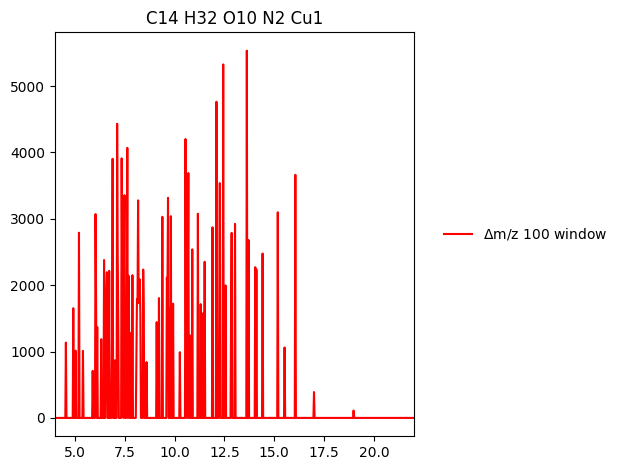

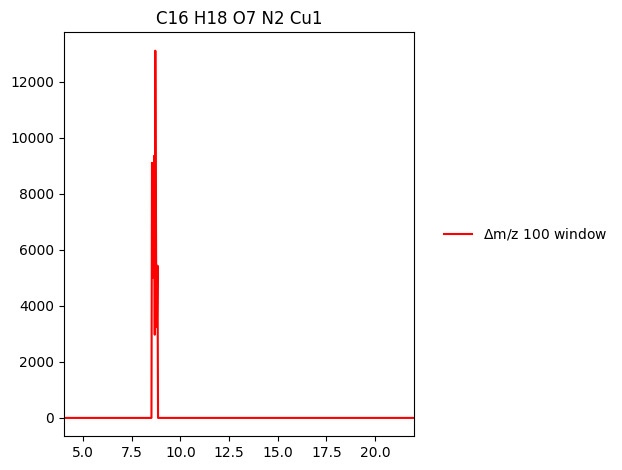

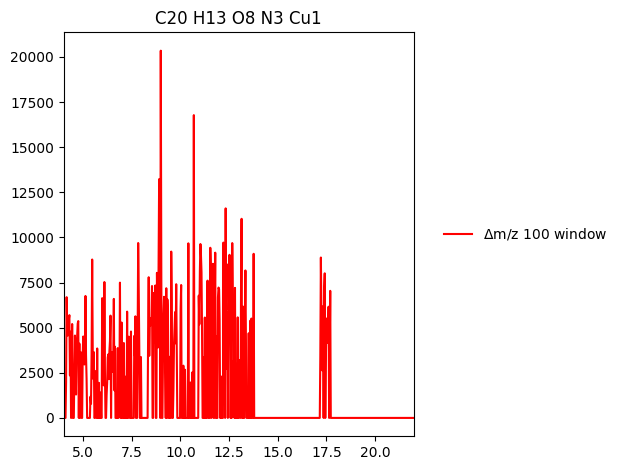

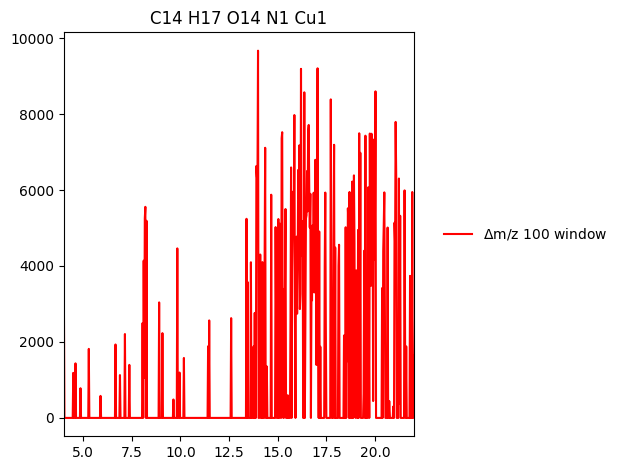

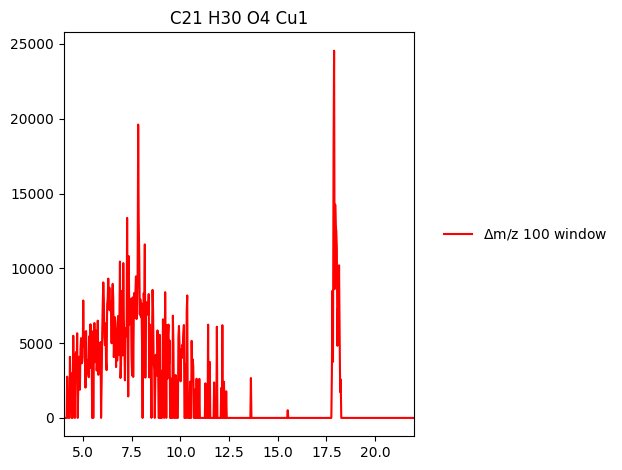

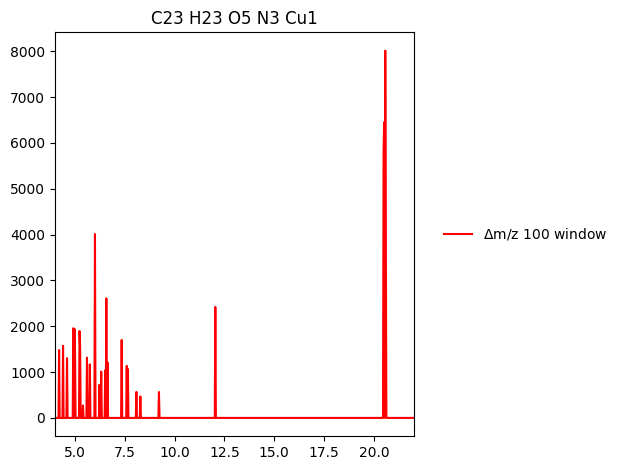

In [43]:
#ax.set_ylim(0,maxicp*1.1)

for mf in EICdic:   

    fig, ax = plt.subplots()
    
    eict=EICdic[mf].time
    eics=EICdic[mf].eic

    inds = np.where(np.asarray(eict)<28)

    eict = np.asarray(eict)[inds]
    eics = np.asarray(eics)[inds]

    ax.plot(eict, eics,color = 'red', label=r'$\Delta$m/z 100 window')

    ax.set_xlim(4,22)
    ax.set_title(mf)
    ax.legend(frameon = False,bbox_to_anchor=(1.05,0.5),loc='center left')
    fig.tight_layout()

    plt.show()

In [ ]:
# 200 m/z window, error plots with blanks removed 

df = lcmsfns.blankSubtract(unique_200mz, blnkthresh = 0.6)
print(np.shape(unique_200mz))
print(np.shape(df))

fig = lcmsfns.plotUnique(df,ps=10)
fig.suptitle('200 m/z window, '+ttt, fontsize=14)

fig.set_size_inches(8,9)
plt.tight_layout()

plt.show()


In [ ]:
# full m/z window, error plots with blanks removed 

mask = ~unique_fullmz_456['file'].str.contains('qh2o', case=False, na=False)
unique_fullmz_nb=unique_fullmz_456[mask]
df = lcmsfns.blankSubtract(unique_fullmz_456, blnkthresh = 0.6)
print(np.shape(unique_fullmz_456))
print(np.shape(df))

fig = lcmsfns.plotUnique(df,ps=10)
fig.suptitle('1000 m/z window, '+ttt, fontsize=14)

fig.set_size_inches(8,9)
plt.tight_layout()

plt.show()

In [ ]:
##### here 

temp = df_bs[abs(df_bs['m/z Error (ppm)'])<0.15]
print(np.shape(temp))
fig = lcmsfns.plotUnique(pd.concat([temp[temp['m/z window']== '400-500 m/z'], temp[temp['m/z window']=='500-600 m/z'], temp[temp['m/z window']=='400-600 m/z'], temp[temp['m/z window']=='200-1200 m/z']]),ps=5)

plt.tight_layout()
plt.show()
plt.close('all')

In [ ]:
mz100_bs = df_bs[(df_bs['m/z window'] == '400-500 m/z') | (df_bs['m/z window'] == '500-600 m/z')]

mz200_bs = df_bs[(df_bs['m/z window'] == '400-600 m/z')]

mzfull_bs = df_bs[(df_bs['m/z window'] == '200-1200 m/z')]
mzfull_bs = mzfull_bs[(mzfull_bs['m/z']>=400) & (mzfull_bs['m/z']<= 600)]

df = mz100_bs
df2 = mz200_bs
df3 = mzfull_bs
fig, ax = plt.subplots()
ax.scatter(x=df['N/C'],y=df['O/C'],c='C3',s=50,label='400-500 m/z\n500-600 m/z')#,s=df['S/N']
#sns.scatterplot(x='N/C',y='O/C', hue='m/z', data=df, ax=ax,s=50)
ax.scatter(x=df2['N/C'],y=df2['O/C'],c='C0',s=5,label='400-600 m/z') #s=df2['S/N'],
#ax.scatter(x=df3['N/C'],y=df3['O/C'],c='C5',label='200-1200 m/z') #s=df3['S/N']
ax.set(xlabel='O/C',ylabel='N/C')
#ax.set_xlim(0,1.2)
#ax.set_ylim(0,0.5)
ax.legend(frameon=False, bbox_to_anchor=(1.0,0.5), loc='center left')
plt.title(r'Narrow window ($\Delta$m/z 100) and mid window ($\Delta$m/z 200)')
plt.show()


In [ ]:
mz100_bs = df_bs[(df_bs['m/z window'] == '400-500 m/z') | (df_bs['m/z window'] == '500-600 m/z')]

mz200_bs = df_bs[(df_bs['m/z window'] == '400-600 m/z')]

mzfull_bs = df_bs[(df_bs['m/z window'] == '200-1200 m/z')]
mzfull_bs = mzfull_bs[(mzfull_bs['m/z']>=400) & (mzfull_bs['m/z']<= 600)]

df = mz100_bs
df2 = mz200_bs
df3 = mzfull_bs
fig, ax = plt.subplots()
ax.scatter(x=df['N/C'],y=df['O/C'],c='C3',label='400-500 m/z\n500-600 m/z')#,s=df['S/N']
#ax.scatter(x=df2['N/C'],y=df2['O/C'],c='black',s=5,label='400-600 m/z') #s=df2['S/N'],
ax.scatter(x=df3['N/C'],y=df3['O/C'],c='black',s=5,label='200-1200 m/z') #s=df3['S/N']
ax.set(xlabel='O/C',ylabel='N/C')
#ax.set_xlim(0,1.2)
#ax.set_ylim(0,0.5)
ax.legend(frameon=False, bbox_to_anchor=(1.0,0.5), loc='center left')
plt.title(r'Narrow window ($\Delta$m/z 100) and full window')
plt.show()


In [ ]:
mz100_contains_cu = mz100_bs[(mz100_bs['Cu'] == 1) ]
print(np.shape(mz100_contains_cu))


mz200_contains_cu = mz200_bs[(mz200_bs['Cu'] == 1) ]
print(np.shape(mz200_contains_cu))


mzfull_contains_cu = mzfull_bs[(mzfull_bs['Cu'] == 1)]
print(np.shape(mzfull_contains_cu))



In [ ]:
temp = temp[temp['Cu'] == 1]

temp['overlap'] = temp.Index

for i in range(len(temp['Molecular Formula'])):

    mf = temp['Molecular Formula'].iloc[i]

    if (mf not in mzfull_contains_cu['Molecular Formula'].values) and (mf not in mz200_contains_cu['Molecular Formula'].values):
        temp['overlap'].iloc[i] = 'n'

    elif (mf in mzfull_contains_cu['Molecular Formula'].values) and (mf not in mz200_contains_cu['Molecular Formula'].values):
        
        temp['overlap'].iloc[i] = 'nw'

    elif (mf not in mzfull_contains_cu['Molecular Formula'].values) and (mf in mz200_contains_cu['Molecular Formula'].values):
        
        temp['overlap'].iloc[i] = 'nm'

    elif (mf in mzfull_contains_cu['Molecular Formula'].values) and (mf in mz200_contains_cu['Molecular Formula'].values):
        
        temp['overlap'].iloc[i] = 'nmw'



In [ ]:
sns.jointplot(data=temp, x='N/C',y='O/C', hue='overlap')

In [ ]:
print(np.shape(mzfull_contains_cu))
print(np.shape(mz100_contains_cu))

combo_cu = pd.concat([mz100_contains_cu, mzfull_contains_cu])


In [ ]:

combo_cu['m/z Window Size'] = combo_cu.Index

for i in range(len(combo_cu['m/z window'])):

    w = combo_cu['m/z window'].iloc[i]

    if (w == '400-500 m/z') or (w == '500-600 m/z'):
        
        combo_cu['m/z Window Size'].iloc[i] = '100 m/z'

    elif (w == '400-600 m/z'):
        
        combo_cu['m/z Window Size'].iloc[i] = '200 m/z'

    elif (w == '200-1200 m/z'):
        
        combo_cu['m/z Window Size'].iloc[i] = '1000 m/z'

combo_cu['m/z Window Size'].unique()

In [ ]:
mz100_cu_limited_err.columns

In [ ]:
import matplotlib.gridspec as gridspec

#fig, (ax1_t,ax1_b, ax2) = plt.subplots(nrows=3, ncols=1, sharex = True, gridspec_kw={'hspace':0.02})
plt.subplots_adjust(hspace=0.02)
#make outer gridspec
outer = gridspec.GridSpec(2, 1, height_ratios = [1, 1]) 
#make nested gridspecs
gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[1])
gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[0], hspace = .05)

d1=lcmsfns.normMS(mz100_cu_limited_err,mz100_cu_limited_err)
d2=lcmsfns.normMS(mzfull_cu_limited_err,mzfull_cu_limited_err)

ax1_b = plt.subplot(gs1[0])
ax1_b = lcmsfns.plot_ms(df1=d1,  df2=d2, start_mz=400, end_mz=600,ax_ms=ax1_b, norm=True)

sns.despine(ax=ax1_b)

ax1_b.set_ylim(bottom=0)





ax2 = plt.subplot(gs2[0])

sns.despine(ax=ax2)

sns.histplot(combo_cu, x="Calibrated m/z", hue="m/z Window Size", multiple="stack", ax=ax2)
ax2.set_ylabel('Assigned Features (count)')
ax2.set_xlim(400,600)
legend = ax2.get_legend()
handles = legend.legendHandles
labels = ['100 m/z','1000 m/z']
ax2.legend_.remove()

fig = plt.gcf()

fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.5), loc='center left',frameon=False, borderaxespad=0, title = 'Window Size')

plt.show()

In [ ]:
combo = pd.concat([mz100_bs, mzfull_bs])

combo['m/z Window Size'] = combo.Index

for i in range(len(combo['m/z window'])):

    w = combo['m/z window'].iloc[i]

    if (w == '400-500 m/z') or (w == '500-600 m/z'):
        
        combo['m/z Window Size'].iloc[i] = '100 m/z'

    elif (w == '400-600 m/z'):
        
        combo['m/z Window Size'].iloc[i] = '200 m/z'

    elif (w == '200-1200 m/z'):
        
        combo['m/z Window Size'].iloc[i] = '1000 m/z'

combo['m/z Window Size'].unique()

combo_n = combo[combo['N']>=1]

import matplotlib.gridspec as gridspec

#fig, (ax1_t,ax1_b, ax2) = plt.subplots(nrows=3, ncols=1, sharex = True, gridspec_kw={'hspace':0.02})
plt.subplots_adjust(hspace=0.3)
#make outer gridspec
outer = gridspec.GridSpec(2, 1, height_ratios = [1, 1]) 
#make nested gridspecs
gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[1])
gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[0])

ax1 = plt.subplot(gs1[0])

sns.histplot(combo, x="Calibrated m/z", hue="m/z Window Size", multiple="stack", ax=ax1)
ax1.set_ylabel('Assigned Features\n(count)')
ax1.legend_.remove()
ax1.set_xlim(400,600)
sns.despine(ax=ax1)





ax2 = plt.subplot(gs2[0])

sns.despine(ax=ax2)

sns.histplot(combo_cu, x="Calibrated m/z", hue="m/z Window Size", multiple="stack", ax=ax2)
ax2.set_ylabel('Assigned Cu Features\n(count)')
ax2.set_xlim(400,600)
legend = ax2.get_legend()
handles = legend.legendHandles
labels = ['100 m/z','1000 m/z']
ax2.legend_.remove()

fig = plt.gcf()

fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.5), loc='center left',frameon=False, borderaxespad=0, title = 'Window Size')

plt.show()

In [ ]:

print((np.shape(combo[combo['m/z Window Size']=='100 m/z'])[0] - np.shape(combo[combo['m/z Window Size']=='1000 m/z'])[0]) /  np.shape(combo[combo['m/z Window Size']=='1000 m/z'])[0])

print((np.shape(combo_cu[combo_cu['m/z Window Size']=='100 m/z'])[0] - np.shape(combo_cu[combo_cu['m/z Window Size']=='1000 m/z'])[0]) / np.shape(combo_cu[combo_cu['m/z Window Size']=='1000 m/z'])[0])

In [ ]:
#data.master_data_holder['20221103_LBA_Boiteau_Zorbax3p5_spring_400_500_rep2.raw'] #[file]={'parser': parser}
mz100_cu_limited_err = mz100_contains_cu[abs(mz100_contains_cu['m/z Error (ppm)']) < 0.25]
mz100_EICdic = {}
for mz,file,mf in zip(mz100_cu_limited_err['m/z'],mz100_cu_limited_err['file'],mz100_cu_limited_err['Molecular Formula']):
    
    parser = data.master_data_holder[file]['parser']    
 
    EIC=parser.get_eics(target_mzs=[mz],tic_data={},peak_detection=False,smooth=False)
    mz100_EICdic[mf]=EIC[0][mz]
    #mz100_EICdic[mz]={'eic':EIC[0][mz],'formula':mf}


In [ ]:
mzfull_cu_limited_err = mzfull_contains_cu[abs(mzfull_contains_cu['m/z Error (ppm)']) < 0.25]
fullmz_EICdic = {}
for mz,file,mf in zip(mzfull_cu_limited_err['m/z'],mzfull_cu_limited_err['file'],mzfull_cu_limited_err['Molecular Formula']):
    
    parser = data.master_data_holder[file]['parser']
 
    EIC=parser.get_eics(target_mzs=[mz],tic_data={},peak_detection=False,smooth=False)
    fullmz_EICdic[mf]=EIC[0][mz]

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

icpms_file = '/Users/christiandewey/Library/CloudStorage/Box-Box/Boiteau Lab/Mass Spec Data/Keck iCAP Q/2022/2022-09/Tillamook, Sept 2022/spring_ENV.csv'
icpms = pd.read_csv(icpms_file, sep=';',header=1)


metals = ['63Cu', '115In']

pdf = PdfPages('/Users/christiandewey/Library/CloudStorage/Box-Box/data/assignments/spring/eics_cu_100mz_fullmz-dec13.pdf')

fig, ax = plt.subplots()

maxicp = 0 
for me in metals:
    me_key = 'Time %s' %me
    ax.plot(icpms[me_key]/60, icpms[me], label=me)        
    



#ax.set_ylim(0,maxicp*1.1)
ax.set_title('Cu ICPMS Trace')
ax.set_xlabel('Time (min)')
ax.set_ylabel('ICPMS signal (cps)')
ax.legend(bbox_to_anchor=(1.05,0.5),loc='center left',frameon =False)
ax.set_xlim(2,30)
fig.tight_layout()
pdf.savefig()

for mf in mz100_EICdic:   

    fig, ax = plt.subplots()
    
    eict=mz100_EICdic[mf].time
    eics=mz100_EICdic[mf].eic

    inds = np.where(np.asarray(eict)<28)

    eict = np.asarray(eict)[inds]
    eics = np.asarray(eics)[inds]

    ax.plot(eict, eics,color = 'red', label=r'$\Delta$m/z 100 window')

    if mf in fullmz_EICdic:
        eic2t = fullmz_EICdic[mf].time
        eic2s = fullmz_EICdic[mf].eic

        eic2t = np.asarray(eic2t)[inds]
        eic2s = np.asarray(eic2s)[inds]
        ax.plot(eic2t,eic2s, color ='C0', label = 'full window')
    ax.set_xlim(4,28)
    ax.set_title(mf)
    ax.legend(frameon = False,bbox_to_anchor=(1.05,0.5),loc='center left')
    fig.tight_layout()
    pdf.savefig()

for mf in fullmz_EICdic:   

    if mf not in mz100_EICdic:

        fig, ax = plt.subplots()

        eic2t = fullmz_EICdic[mf].time
        eic2s = fullmz_EICdic[mf].eic

        inds = np.where(np.asarray(eic2t)<28)

        eic2t = np.asarray(eic2t)[inds]
        eic2s = np.asarray(eic2s)[inds]
        ax.plot(eic2t,eic2s, color ='C5', label = 'full window')

        ax.set_xlim(4,28)
        ax.set_title(mf)
        ax.legend(frameon = False,bbox_to_anchor=(1.05,0.5),loc='center left')
        fig.tight_layout()
        pdf.savefig()

pdf.close()

In [ ]:
# C23 H32 O3 Cu

sub = combo[combo['Molecular Formula'] == 'C23 H32 O3 Cu1']

sub

In [ ]:
for i in range(len(mz100_cu_limited_err.index)):

    mf = mz100_cu_limited_err['Molecular Formula'].iloc[i]
    
    if mf in mzfull_cu_limited_err['Molecular Formula'].values:

        print('\n\nNarrow m/z:')
        print(mz100_cu_limited_err.iloc[i,:])

        ind = mzfull_cu_limited_err[mzfull_cu_limited_err['Molecular Formula'] == mf].index 
        print('\nFull m/z:')
        print(mzfull_cu_limited_err.loc[ind].squeeze())




In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

pdf = PdfPages('/Users/christiandewey/Library/CloudStorage/Box-Box/data/assignments/spring/eics_cu_100mz_fullmz-dec5.pdf')


for mf in mz100_EICdic:   

    fig, ax = plt.subplots()
    
    eict=mz100_EICdic[mf].time
    eics=mz100_EICdic[mf].eic

    inds = np.where(np.asarray(eict)<28)

    eict = np.asarray(eict)[inds]
    eics = np.asarray(eics)[inds]

    ax.plot(eict, eics,color = 'red', label=r'$\Delta$m/z 100 window')

    if mf in fullmz_EICdic:
        eic2t = fullmz_EICdic[mf].time
        eic2s = fullmz_EICdic[mf].eic

        eic2t = np.asarray(eic2t)[inds]
        eic2s = np.asarray(eic2s)[inds]
        ax.plot(eic2t,eic2s, color ='C0', label = 'full window')
    ax.set_xlim(4,28)
    ax.set_title(mf)
    ax.legend(frameon = False,bbox_to_anchor=(1.05,0.5),loc='center left')
    fig.tight_layout()
    pdf.savefig()

for mf in fullmz_EICdic:   

    if mf not in mz100_EICdic:

        fig, ax = plt.subplots()

        eic2t = fullmz_EICdic[mf].time
        eic2s = fullmz_EICdic[mf].eic

        inds = np.where(np.asarray(eic2t)<28)

        eic2t = np.asarray(eic2t)[inds]
        eic2s = np.asarray(eic2s)[inds]
        ax.plot(eic2t,eic2s, color ='C5', label = 'full window')

        ax.set_xlim(4,28)
        ax.set_title(mf)
        ax.legend(frameon = False,bbox_to_anchor=(1.05,0.5),loc='center left')
        fig.tight_layout()
        pdf.savefig()

pdf.close()

In [ ]:
refs = pd.read_csv('/Users/christiandewey/CoreMS/tests/tests_data/ftms/nom_pos.ref')
#r45 = refs[(refs['m/z value']>=400) & (refs['m/z value']<=500)]

print(refs[' m/z value'])


In [ ]:
import math
#assigned_100mz
#assigned_200mz
#assigned_fullmz[assigned_fullmz['13C'] == 1]
test1 = []
test2 = []
for i in range(len(unique_fullmz[unique_fullmz['13C'] == 1].index)):
    
    r13c = unique_fullmz[unique_fullmz['13C'] == 1].iloc[i]
    mf13c = r13c['Molecular Formula']
    iso_sim = r13c['Isotopologue Similarity']
    
    mono_index = int(r13c['Mono Isotopic Index'])

    r13c.fillna(0,inplace=True)
    nC = int(r13c['C'])
    n13C = int(r13c['13C'])
    nH = int(r13c['H'])
    nO = int(r13c['O'])
    nN = int(r13c['N'])

    if (nO > 0) and (~math.isnan(nO)):
        mf_t = 'C%s H%s O%s' %((nC + n13C),nH,nO)
    elif (nN > 0) and (~math.isnan(nN)):
        mf_t = 'C%s H%s O%s N%s' %((nC + n13C),nH,nO, nN)
    else:
        mf_t = 'C%s H%s' %((nC + n13C),nH)

   # print('\n',mf_t)
    if mf_t in unique_fullmz['Molecular Formula']:
        print('yyy')
        print(unique_fullmz[unique_fullmz['Molecular Formula'] == mf_t])
    #mf12c = unique_fullmz[unique_fullmz['Isotopologue Similarity']==iso_sim]['Molecular Formula']

    #temp2 = mf12c.values
    #print('\ntemp2')
    #print(temp2)
    #for i in range(len(temp2)):
    #    test2.append(temp2[i])

    mf12c_in = unique_fullmz[unique_fullmz['Index']==mono_index]
    best_match = mf12c_in[mf12c_in['Isotopologue Similarity']==iso_sim]['Molecular Formula']

    temp=best_match.values
    print('temp')
    print(mf13c,mono_index,temp)
    for i in range(len(temp)):
        test1.append(temp[i])


#print('\n', mf13c,'\n',best_match)

print(len(test1))

In [ ]:
mono_indices = []
iso_indices = []
for i in unique_fullmz[unique_fullmz['13C'] == 1].index:

    r13c = unique_fullmz.loc[i]

    mf13c = r13c['Molecular Formula']
    iso_sim = r13c['Isotopologue Similarity']    
    mono_index = int(r13c['Mono Isotopic Index'])

    mf12c_in = unique_fullmz[unique_fullmz['Index']==mono_index]
    best_match = mf12c_in[mf12c_in['Isotopologue Similarity']==iso_sim].index

    if len(best_match.values) > 0:
        
        mono_indices.append(best_match.values[0])

        iso_indices.append(i)

print(len(mono_indices),len(iso_indices))

In [ ]:
df = assigned_fullmz[assigned_fullmz['file'] == '20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw']
df = assigned_100mz_456[assigned_fullmz['file'] == '20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw']

intensity_v_ratio = []

for t in df['Time'].unique():

    print(t)

    time_sub = df[df['Time'] == t]

    time_sub['13C'].fillna(0)
   # print(time_sub['Index'])
    if 1.0 in time_sub['13C'].values:

        for i in time_sub[time_sub['13C'] == 1].index:

            iso_row = time_sub.loc[i]

            #print(iso_row)

            mf_13C = iso_row['Molecular Formula']
            mono_index = int(iso_row['Mono Isotopic Index'])
            mf_12C = time_sub[time_sub['Index']==mono_index]['Molecular Formula']
            nC =  time_sub[time_sub['Index']==mono_index]['C'].iloc[0]
            #print(mf_13C, mono_index, mf_12C)

            int_13C = iso_row['Peak Height']
            mz_13C = iso_row['Calibrated m/z']
            int_12C =  time_sub[time_sub['Index']==mono_index]['Peak Height'].iloc[0]
            mz_12C =  time_sub[time_sub['Index']==mono_index]['Calibrated m/z'].iloc[0]
            print(int_12C, int_13C, nC, mz_12C, mz_13C)
            intensity_v_ratio.append([int_12C, int_13C, nC, mz_12C, mz_13C])







In [ ]:
df = np.asarray(intensity_v_ratio)
np.shape(df)
df1 = df #[df[:,0]<1e5]

pddf = pd.DataFrame(df1,columns=['12C Intensity','13C Intensity','nC', 'm/z 12C', 'm/z 13C'])


In [ ]:
import scipy

df1 = df[df[:,0]<1e5]
logx = np.log10(df1[:,0])
logy = np.log10(df1[:,2])

logyerr = np.std(df1[:,1]) / df1[:,2]

# define our (line) fitting function
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

pinit = [1.0, -1.0]
out = scipy.optimize.leastsq(errfunc, pinit,
                       args=(logx, logy, logyerr), full_output=1)

pfinal = out[0]
covar = out[1]
print(pfinal)
print(covar)

index = pfinal[1]
amp = 10.0**pfinal[0]

indexErr = np.sqrt( covar[1][1] )
ampErr = np.sqrt( covar[0][0] ) * amp

In [ ]:
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

nn = 1e4
df1 = df[df[:,0]<nn]

xData = df1[:,0]
yData = df1[:,1]

xmin = min(xData)
print(xmin)
def func(x, a,  b, c, d): # Sigmoid A With Offset from zunzun.com
    #return a*(x-d)**3 + b*(x-d)**2 + c*x 
    return a*np.exp(b/((x-800)))
    return a*(x-d)**5 + b*(x-d)**2 + c*(x-d)

def func2(x, a,  b, c, d): # Sigmoid A With Offset from zunzun.com
    #return a*(x-d)**3 + b*(x-d)**2 + c*x 
    return a*np.exp((b-x)/((x)))
    return a*(x-d)**5 + b*(x-d)**2 + c*(x-d)

# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return np.sum((yData - val) ** 2.0)



# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData)
fittedParameters2, pcov2 = curve_fit(func2, xData, yData)

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)



##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(df[:,0], df[:,1],  'D')

    # create data for the fitted equation plot
    xModel = np.linspace(1000, nn, int(1e6))
    yModel = func(xModel, *fittedParameters)

    xModel2 = np.linspace(1000, nn, int(1e6))
    yModel2 = func2(xModel2, *fittedParameters2)
    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.plot(xModel2, yModel2, color ='red')

    axes.set_xlim(0,1.1*nn)
    axes.set_ylim(0,1)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

In [ ]:


fig, ax = plt.subplots()

ax.scatter(pddf['12C Intensity'], pddf['12C Intensity']/pddf['13C Intensity']/pddf['nC'])

#ax.errorbar(df1[:,0], df1[:,1], yerr=np.std(df1[:,1]), fmt='k.')  # Data

ax.set_ylim(0,1)

ax.set_xlim(0,1.1e4)
plt.show()

In [ ]:


xx = np.linspace(1, int(5e5), int(1e4))
yy = np.linspace(1, int(5e5), int(1e4))


fig, ax = plt.subplots()

#ax.scatter((pddf['nC']*1.1/100*pddf['12C Intensity']),(pddf['13C Intensity']-(pddf['nC']*1.1/100*pddf['12C Intensity']))/(pddf['nC']*1.1/100*pddf['12C Intensity']))
ax.scatter((pddf['nC']*1.1/100*pddf['12C Intensity']),pddf['13C Intensity'])
#ax.scatter((pddf['nC']*pddf['12C Intensity']),pddf['13C Intensity'])

ax.scatter(xx, yy, color='orange',s=1)

ax.set_xlim(0,10e4)
ax.set_ylim(0,10e4)
ax.plot

plt.show()

In [ ]:
def func2(x, a,  b, c): # Sigmoid A With Offset from zunzun.com
    return 1 - b/((x)**0.5)


yy = (pddf['nC']*1.07/100*pddf['12C Intensity'])
xx = pddf['12C Intensity']

fittedParameters2, pcov2 = curve_fit(func2, xx,  pddf['13C Intensity']/yy)

print(fittedParameters2)
fig, ax = plt.subplots()

ax.scatter(pddf['12C Intensity'], pddf['13C Intensity']/yy,s=1)


xModel2 = np.linspace(1000, 1e6, int(1e6))
yModel2 = func2(xModel2, *fittedParameters2)
# now the model as a line plot 
ax.plot(xModel2, yModel2)

ax.plot(xModel2, yModel2, color ='red')

ax.set_xlim(0,0.5e6)
ax.set_ylim(0,1.05)

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)

ax.set_xlabel(r'Intensity $^{12}$C$_{M}$' + ' (1000s cps)') #'Monoisotopic intensity (1000s cps)')
ax.set_ylabel(r'Intensity $^{13}$C$_{M}$ / Intensity $^{13}$C$_{T}$')
#ax.set_ylabel(r'$\frac{{{%s}}}{%s}$' %(nom,den))

plt.show()

In [ ]:
df_cu = mz100_contains_cu
df_cu['13C'] = df_cu['13C'].fillna(0)
df_cu_mono = df_cu[df_cu['13C']==0]

print(np.shape(df_cu))
print(np.shape(df_cu_mono))

df_cu_mono['Theoretical 65Cu Peak Height'] = df_cu_mono['Peak Height']*.3083

#69.17 and 30.83% 63Cu 65Cu

for i, j in zip(df_cu_mono['Peak Height'], df_cu_mono['Theoretical 65Cu Peak Height']):
    iso_ph = df_cu_mono['C'].iloc[0]*1.1/100*i
    print(i,j, iso_ph)

